In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
df = pd.read_csv('temp_forecast.csv', delimiter=',')
df


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [3]:
df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')

In [4]:
df['Country'].value_counts()

Åland                                  3239
Faroe Islands                          3239
Greece                                 3239
Germany                                3239
Saint Pierre And Miquelon              3239
                                       ... 
Northern Mariana Islands               1329
Guam                                   1329
Heard Island And Mcdonald Islands       788
French Southern And Antarctic Lands     788
Antarctica                              764
Name: Country, Length: 243, dtype: int64

In [5]:
df['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [7]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [8]:
df.Country.unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [9]:
df_country = df.Country.unique()

In [10]:
len(df_country)


243

In [11]:
df_Germany = df.drop('AverageTemperatureUncertainty', axis=1)
df_Germany

,dt,AverageTemperature,Country
0,1743-11-01,4.384,Åland
1,1743-12-01,NaN,Åland
2,1744-01-01,NaN,Åland
3,1744-02-01,NaN,Åland
4,1744-03-01,NaN,Åland
...,...,...,...
577457,2013-05-01,19.059,Zimbabwe
577458,2013-06-01,17.613,Zimbabwe
577459,2013-07-01,17.000,Zimbabwe
577460,2013-08-01,19.759,Zimbabwe


In [12]:
df_Germany = df_Germany[df_Germany.Country == "Germany"]
df_Germany

,dt,AverageTemperature,Country
201440,1743-11-01,5.468,Germany
201441,1743-12-01,NaN,Germany
201442,1744-01-01,NaN,Germany
201443,1744-02-01,NaN,Germany
201444,1744-03-01,NaN,Germany
...,...,...,...
204674,2013-05-01,12.151,Germany
204675,2013-06-01,15.927,Germany
204676,2013-07-01,19.762,Germany
204677,2013-08-01,18.233,Germany


In [13]:
df_Germany = df_Germany.drop('Country',axis=1)
df_Germany

,dt,AverageTemperature
201440,1743-11-01,5.468
201441,1743-12-01,NaN
201442,1744-01-01,NaN
201443,1744-02-01,NaN
201444,1744-03-01,NaN
...,...,...
204674,2013-05-01,12.151
204675,2013-06-01,15.927
204676,2013-07-01,19.762
204677,2013-08-01,18.233


In [14]:
df_Germany.index

Int64Index([201440, 201441, 201442, 201443, 201444, 201445, 201446, 201447,
            201448, 201449,
            ...
            204669, 204670, 204671, 204672, 204673, 204674, 204675, 204676,
            204677, 204678],
           dtype='int64', length=3239)

In [15]:
pd.to_datetime(df_Germany['dt'])

201440   1743-11-01
201441   1743-12-01
201442   1744-01-01
201443   1744-02-01
201444   1744-03-01
            ...    
204674   2013-05-01
204675   2013-06-01
204676   2013-07-01
204677   2013-08-01
204678   2013-09-01
Name: dt, Length: 3239, dtype: datetime64[ns]

In [16]:
df_Germany.index = pd.to_datetime(df_Germany.dt)
df_Germany

,dt,AverageTemperature
dt,,
1743-11-01,1743-11-01,5.468
1743-12-01,1743-12-01,NaN
1744-01-01,1744-01-01,NaN
1744-02-01,1744-02-01,NaN
1744-03-01,1744-03-01,NaN
...,...,...
2013-05-01,2013-05-01,12.151
2013-06-01,2013-06-01,15.927
2013-07-01,2013-07-01,19.762


In [17]:
df_Germany = df_Germany.drop('dt', axis=1)


In [18]:
df_Germany

,AverageTemperature
dt,
1743-11-01,5.468
1743-12-01,NaN
1744-01-01,NaN
1744-02-01,NaN
1744-03-01,NaN
...,...
2013-05-01,12.151
2013-06-01,15.927
2013-07-01,19.762


# Take data from 1970 onwards

In [19]:
# Filtering data starting from 1970-01-01
df_Germany.loc['1970-01-01':]

,AverageTemperature
dt,
1970-01-01,-2.721
1970-02-01,-1.331
1970-03-01,1.234
1970-04-01,5.512
1970-05-01,11.665
...,...
2013-05-01,12.151
2013-06-01,15.927
2013-07-01,19.762


In [20]:
df_Germany = df_Germany.loc['1970-01-01':]

In [21]:
# Testing whether there are null values
df_Germany[df_Germany.isnull()]

,AverageTemperature
dt,
1970-01-01,NaN
1970-02-01,NaN
1970-03-01,NaN
1970-04-01,NaN
1970-05-01,NaN
...,...
2013-05-01,NaN
2013-06-01,NaN
2013-07-01,NaN


In [22]:
len(df_Germany[df_Germany.isnull()])


525

In [23]:
df_Germany.sort_index()

,AverageTemperature
dt,
1970-01-01,-2.721
1970-02-01,-1.331
1970-03-01,1.234
1970-04-01,5.512
1970-05-01,11.665
...,...
2013-05-01,12.151
2013-06-01,15.927
2013-07-01,19.762


In [24]:
df_Germany = df_Germany.sort_index()
df_Germany

,AverageTemperature
dt,
1970-01-01,-2.721
1970-02-01,-1.331
1970-03-01,1.234
1970-04-01,5.512
1970-05-01,11.665
...,...
2013-05-01,12.151
2013-06-01,15.927
2013-07-01,19.762


In [25]:
df_Germany.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='dt', length=525, freq=None)

In [26]:
# Replacing NaN values with the previous effective data
df_Germany.AverageTemperature.fillna(method='pad', inplace=True)

In [27]:
df_Germany[df_Germany.AverageTemperature.isnull()]


,AverageTemperature
dt,


In [28]:
df_Germany.describe()


,AverageTemperature
count,525.000000
mean,8.895307
std,6.695429
min,-6.281000
25%,3.306000
50%,8.417000
75%,15.011000
max,22.343000


In [29]:
 range(0,len(df_Germany.index.values))

range(0, 525)

In [30]:
df_Germany['Ticks'] = range(0,len(df_Germany.index.values))
df_Germany.head(10)

,AverageTemperature,Ticks
dt,,
1970-01-01,-2.721,0
1970-02-01,-1.331,1
1970-03-01,1.234,2
1970-04-01,5.512,3
1970-05-01,11.665,4
1970-06-01,17.371,5
1970-07-01,16.565,6
1970-08-01,17.229,7
1970-09-01,13.804,8


In [31]:
df_Germany.tail(10)


,AverageTemperature,Ticks
dt,,
2012-12-01,1.216,515
2013-01-01,-0.067,516
2013-02-01,-0.731,517
2013-03-01,0.394,518
2013-04-01,8.213,519
2013-05-01,12.151,520
2013-06-01,15.927,521
2013-07-01,19.762,522
2013-08-01,18.233,523


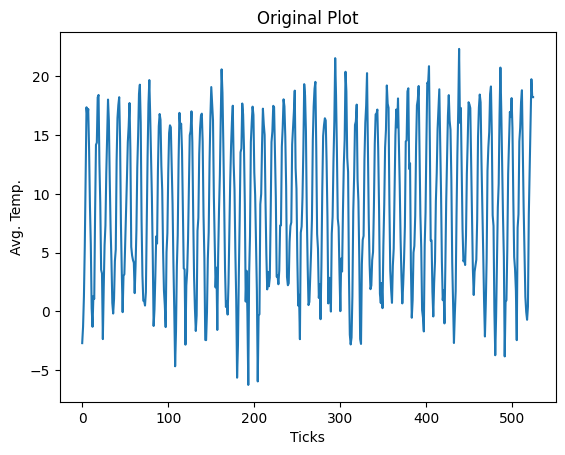

In [32]:
#very simple plotting
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Avg. Temp.')
ax1.set_title('Original Plot')
ax1.plot('Ticks', 'AverageTemperature', data = df_Germany);

In [33]:
df_Germany


,AverageTemperature,Ticks
dt,,
1970-01-01,-2.721,0
1970-02-01,-1.331,1
1970-03-01,1.234,2
1970-04-01,5.512,3
1970-05-01,11.665,4
...,...,...
2013-05-01,12.151,520
2013-06-01,15.927,521
2013-07-01,19.762,522


# cheak stationarity

In [38]:
from statsmodels.tsa.stattools import adfuller


def stationarity_check(ts):
    
    # Determing rolling statistics
    roll_mean = ts.rolling( window=12).mean()
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)


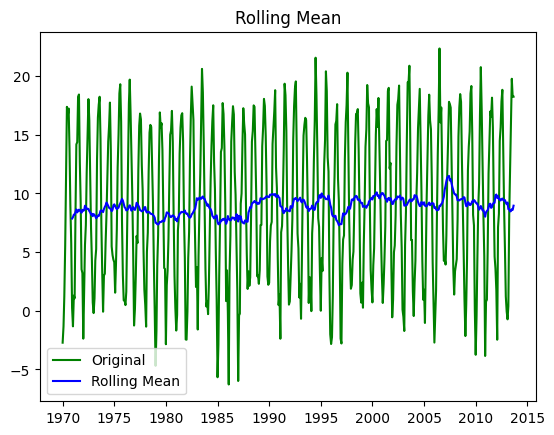

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-4.271198430066117, 0.0004980878075374234, 16, 508, {'1%': -3.44328828958775, '5%': -2.8672462791357867, '10%': -2.569809231353463}, 2060.5638228165117)
df_output: 
 Test Statistic                  -4.271198
p-value                          0.000498
#Lags Used                      16.000000
Number of Observations Used    508.000000
dtype: float64
Test Statistic                  -4.271198
p-value                          0.000498
#Lags Used                      16.000000
Number of Observations Used    508.000000
Critical Value (1%)             -3.443288
Critical Value (5%)             -2.867246
Critical Value (10%)            -2.569809
dtype: float64


In [39]:
stationarity_check(df_Germany.AverageTemperature)

In [40]:
df_Germany['Roll_Mean'] = df_Germany['AverageTemperature'].rolling(window=12).mean()
df_Germany

,AverageTemperature,Ticks,Roll_Mean
dt,,,
1970-01-01,-2.721,0,NaN
1970-02-01,-1.331,1,NaN
1970-03-01,1.234,2,NaN
1970-04-01,5.512,3,NaN
1970-05-01,11.665,4,NaN
...,...,...,...
2013-05-01,12.151,520,8.462667
2013-06-01,15.927,521,8.488000
2013-07-01,19.762,522,8.648667


# Auto correlation and partial autocorrelation

In [41]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf


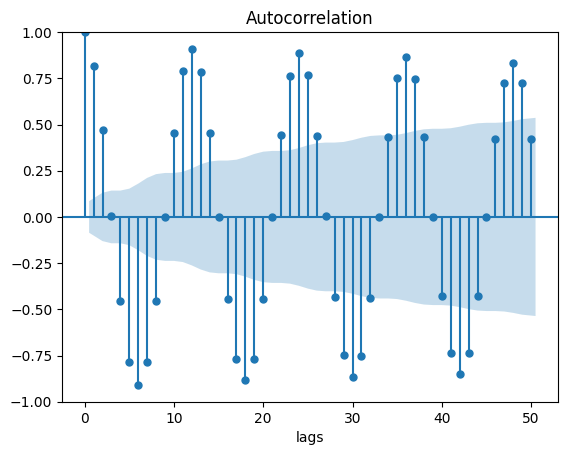

In [42]:
# Plot the  autocorrelation function

plot_acf(df_Germany['AverageTemperature'], lags=50)
plt.xlabel('lags')
plt.show()



C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


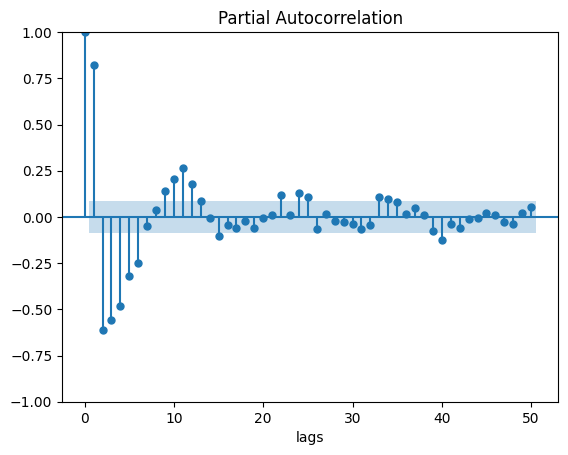

In [43]:
# Plot the partial autocorrelation function
plot_pacf(df_Germany['AverageTemperature'], lags=50)
plt.xlabel('lags')
plt.show()

# ARIMA MODEL

In [56]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_Germany.AverageTemperature, order=(1, 1, 1))
results = model.fit()

C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [57]:
results

In [58]:
from statsmodels.tsa.arima.model import ARIMA

import itertools

p = q = range(0, 4)
d = range(0, 2)
pdq = itertools.product(p, d, q)
for param in pdq:
    
    model = ARIMA(df_Germany.AverageTemperature, order=param)
    results = model.fit()
    print('ARIMA{} - AIC:{}'.format(param, results.aic))


C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471:

ARIMA(0, 0, 0) - AIC:3489.3808038213215
ARIMA(0, 0, 1) - AIC:3055.9916545081533
ARIMA(0, 0, 2) - AIC:2864.5560706523315


C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 3) - AIC:2737.8610808630074
ARIMA(0, 1, 0) - AIC:2938.8020402606503
ARIMA(0, 1, 1) - AIC:2853.0231127306124
ARIMA(0, 1, 2) - AIC:2797.2322491509176


C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471:

ARIMA(0, 1, 3) - AIC:2864.5379261520748
ARIMA(1, 0, 0) - AIC:2902.0000086421487


C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471:

ARIMA(1, 0, 1) - AIC:2794.013184339923


C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2) - AIC:2723.0526045862794


C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 3) - AIC:2852.213870789462
ARIMA(1, 1, 0) - AIC:2809.6076637119427
ARIMA(1, 1, 1) - AIC:2807.6008503960234


C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471:

ARIMA(1, 1, 2) - AIC:2792.6220900820945


C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 3) - AIC:2746.815259985893
ARIMA(2, 0, 0) - AIC:2655.3745330573765


C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471:

ARIMA(2, 0, 1) - AIC:2374.264695501745


C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\bas

ARIMA(2, 0, 2) - AIC:2116.9076524389093


C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\bas

ARIMA(2, 0, 3) - AIC:2097.9158738219066
ARIMA(2, 1, 0) - AIC:2802.535023899332
ARIMA(2, 1, 1) - AIC:2799.550708208277
ARIMA(2, 1, 2) - AIC:2331.4576076316434


C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodel

ARIMA(2, 1, 3) - AIC:2107.2374687137262
ARIMA(3, 0, 0) - AIC:2463.2596777474887
ARIMA(3, 0, 1) - AIC:2292.154928335878


C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodel

ARIMA(3, 0, 2) - AIC:2099.1506377548067


C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\bas

ARIMA(3, 0, 3) - AIC:2121.147948265192
ARIMA(3, 1, 0) - AIC:2773.2121893189424
ARIMA(3, 1, 1) - AIC:2463.9840736768524


C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:2295.2187859030746


C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 3) - AIC:2099.2595552403222


C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\mangeshk\Anaconda3\envs\projectenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


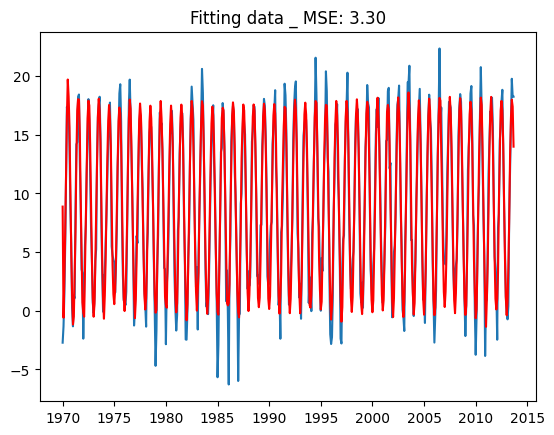

In [62]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_Germany.AverageTemperature, order=(2, 0, 3))
results_MA = model.fit()
plt.plot(df_Germany.AverageTemperature)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('Fitting data _ MSE: %.2f'% (((results_MA.fittedvalues-df_Germany.AverageTemperature)**2).mean()))
plt.show()


In [63]:
results_MA.predict('01/01/1970', '12/01/2023')


1970-01-01     8.873005
1970-02-01    -0.592392
1970-03-01     2.525713
1970-04-01     6.558089
1970-05-01    11.504064
                ...    
2023-08-01    16.983803
2023-09-01    13.754166
2023-10-01     9.216276
2023-11-01     4.586414
2023-12-01     1.105501
Freq: MS, Name: predicted_mean, Length: 648, dtype: float64

In [64]:
predictions=results_MA.predict('01/01/1970', '12/01/2023')
predictions

1970-01-01     8.873005
1970-02-01    -0.592392
1970-03-01     2.525713
1970-04-01     6.558089
1970-05-01    11.504064
                ...    
2023-08-01    16.983803
2023-09-01    13.754166
2023-10-01     9.216276
2023-11-01     4.586414
2023-12-01     1.105501
Freq: MS, Name: predicted_mean, Length: 648, dtype: float64

<Axes: >

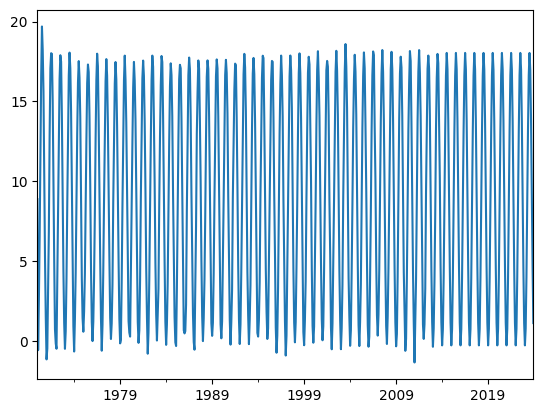

In [65]:
predictions.plot()